In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nlte

from utils import *

In [2]:
population_nlte_1 = [0.0 for _ in range(52)]; population_nlte_1[0] = 1.0

count = int(10)
temperatures = np.full(count, 1.0e5)
electron_number_densities = np.linspace(1.0e1, 1.0e10, num=count)

In [3]:
b_factors = calculate_b_factors(
    population_nlte_1,
    temperatures,
    electron_number_densities,
)

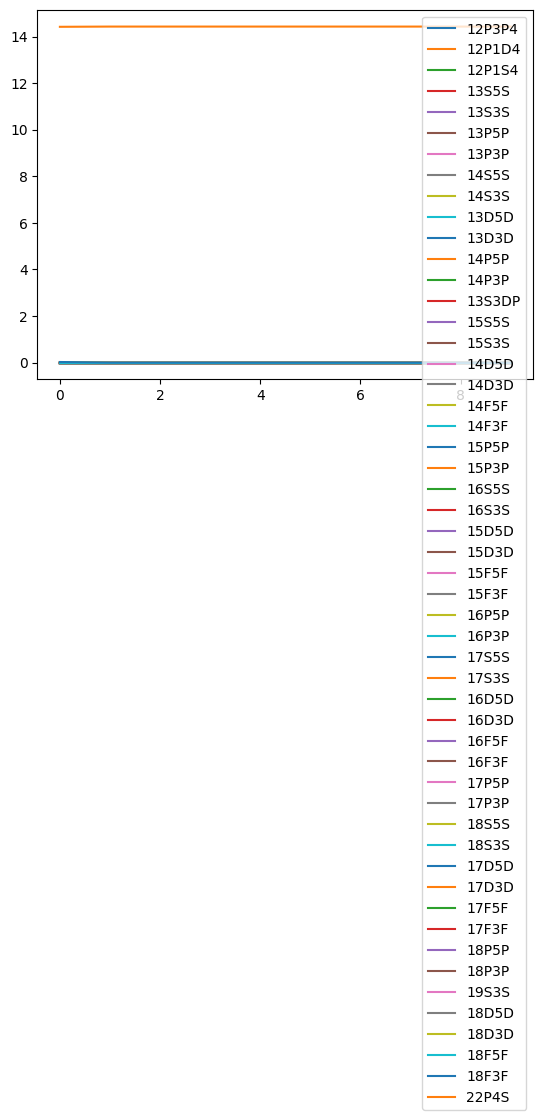

In [4]:
for i, key in enumerate(nlte.Oxygen.keys):
    plt.plot(b_factors.T[i], label=key)
plt.legend()
plt.show()

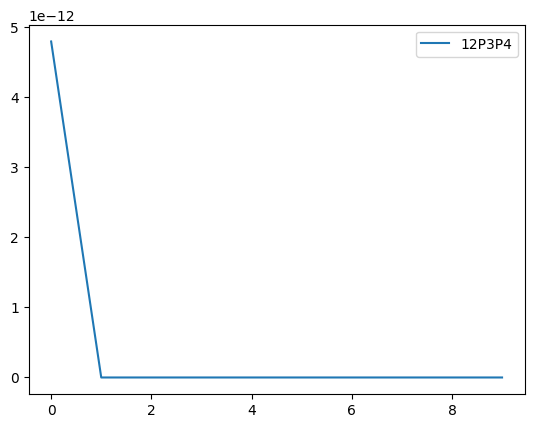

In [5]:
plot_b_factors(b_factors, "12P3P4")